In [2]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/deep_unet'
device = torch.device('cuda:3')

In [3]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [4]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [5]:
from torch import nn
from torch.optim import Adam

from models.Unet import Unet

net = Unet(3, 1, 64, 6).to(device)
optimizer = Adam(net.parameters(), lr=lr)
criterion = nn.BCELoss()

In [6]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, ck_dir=ck_dir)

Epoch: 0, Train Loss: 0.749800260066986, Test Loss: 0.9344939610362055
Saving model to checkpoint/deep_unet/check0.pt
Epoch: 1, Train Loss: 0.6304230642318726, Test Loss: 0.5819716832041744
val_loss improved from 0.9345 to 0.5820, saving model to checkpoint/deep_unet/check1.pt
Epoch: 2, Train Loss: 0.5594130587577818, Test Loss: 0.47621519103646287
val_loss improved from 0.5820 to 0.4762, saving model to checkpoint/deep_unet/check2.pt
Epoch: 3, Train Loss: 0.4960859668254851, Test Loss: 0.4189561058580876
val_loss improved from 0.4762 to 0.4190, saving model to checkpoint/deep_unet/check3.pt
Epoch: 4, Train Loss: 0.4320282602310181, Test Loss: 0.418573994189501
val_loss improved from 0.4190 to 0.4186, saving model to checkpoint/deep_unet/check4.pt
Epoch: 5, Train Loss: 0.36343163728713984, Test Loss: 0.3069389329850676
val_loss improved from 0.4186 to 0.3069, saving model to checkpoint/deep_unet/check5.pt
Epoch: 6, Train Loss: 0.31092883110046393, Test Loss: 0.3561552682518958
Epoch: 7

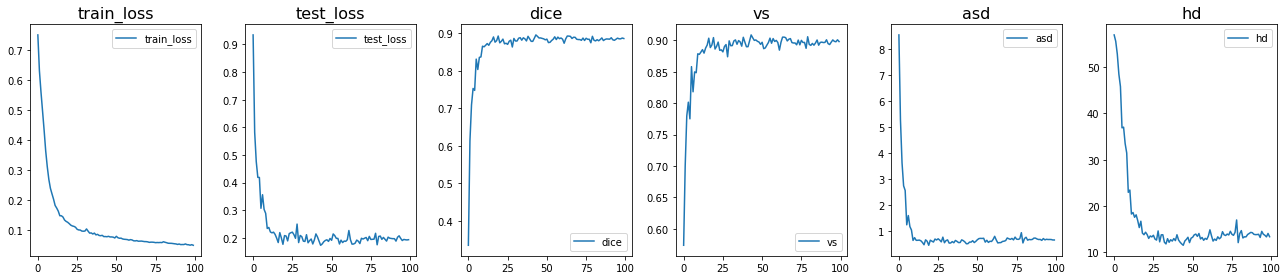

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

In [8]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)